In [86]:
import pandas as pd
import yfinance as yf

# Download 'BP' stock data from Yahoo Finance
bp = yf.download('BP', start='1990-04-06', end='2022-03-02', interval='1wk')

# Download 'SHEL' stock data from Yahoo Finance
shel = yf.download('SHEL', start='1990-04-06', end='2022-03-02', interval='1wk')


# Save the BP stock data to a CSV file
shel.to_csv('BP stock price.csv')

# Save the SHEL stock data to a CSV file
shel.to_csv('SHEL stock price.csv')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [114]:
import warnings
warnings.filterwarnings('ignore')

# Read BP stock prices CSV file
df_stock_BP = pd.read_csv("BP stock price.csv", parse_dates=["Date"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

# Read SHEL stock prices CSV file
df_stock_SHEL = pd.read_csv("SHEL stock price.csv", parse_dates=["Date"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

# Read jet fuel prices CSV file
df_fuel = pd.read_csv("Jet fuel price last 30 years.csv", parse_dates=["Date"])

# Resample fuel prices data to business days
df_fuel = df_fuel.set_index('Date').resample('B').ffill().reset_index()


# Display first 10 rows of the BP stock prices
print("First 10 rows of stock prices:")
print(df_stock_BP[['Date', 'Close']].head(10))

# Display first 10 rows of stock the SHEL prices
print("First 10 rows of stock prices:")
print(df_stock_SHEL[['Date', 'Close']].head(10))

# Display first 10 rows of fuel prices
print("First 10 rows of fuel prices:")
print(df_fuel[['Date', 'WJFUELUSGULF']].head(10))


# Merge the BP and fuel datasets on the DATE column
merged_data_bp = pd.merge(df_stock_BP, df_fuel, on='Date', how='inner')

# Merge the SHEL and fuel datasets on the DATE column
merged_data_shel = pd.merge(df_stock_SHEL, df_fuel, on='Date', how='inner')

# Calculate the Pearson correlation coefficient between BP stock price and jet fuel prices
corr_bp = merged_data_bp['Close'].corr(merged_data_bp['WJFUELUSGULF'])

# Calculate the Pearson correlation coefficient between SHEL stock price and jet fuel prices
corr_shel = merged_data_shel['Close'].corr(merged_data_shel['WJFUELUSGULF'])

# Display the correlation coefficients
print('Pearson correlation coefficient for BP stock price and jet fuel prices: {:.2f}'.format(corr_bp))
print('Pearson correlation coefficient for SHEL stock price and jet fuel prices: {:.2f}'.format(corr_shel))


First 10 rows of stock prices:
        Date     Close
0 1990-04-02  15.59375
1 1990-04-09  15.65625
2 1990-04-16  15.53125
3 1990-04-23  15.00000
4 1990-04-30  15.96875
5 1990-05-07  16.00000
6 1990-05-14  16.65625
7 1990-05-21  16.09375
8 1990-05-28  16.78125
9 1990-06-04  16.21875
First 10 rows of stock prices:
        Date   Close
0 1994-10-31  27.781
1 1994-11-07  27.375
2 1994-11-14  27.063
3 1994-11-21  26.563
4 1994-11-28  26.813
5 1994-12-05  26.438
6 1994-12-12  26.781
7 1994-12-19  26.750
8 1994-12-26  26.938
9 1995-01-02  26.875
First 10 rows of fuel prices:
        Date  WJFUELUSGULF
0 1990-01-05           NaN
1 1990-01-08         0.504
2 1990-01-09         0.504
3 1990-01-10         0.504
4 1990-01-11         0.504
5 1990-01-12         0.504
6 1990-01-15         0.504
7 1990-01-16         0.504
8 1990-01-17         0.504
9 1990-01-18         0.504
Pearson correlation coefficient for BP stock price and jet fuel prices: 0.44
Pearson correlation coefficient for SHEL stock pri

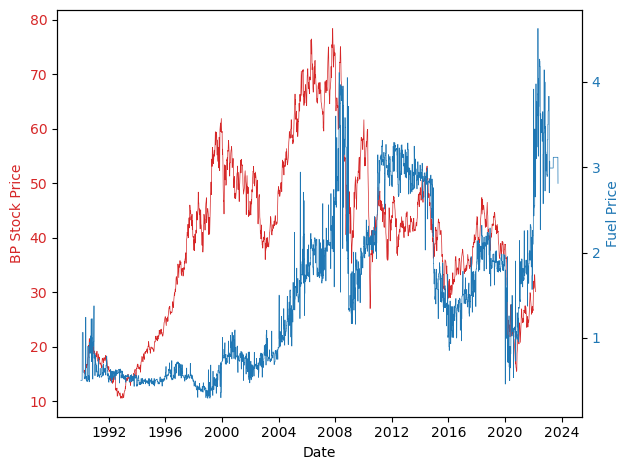

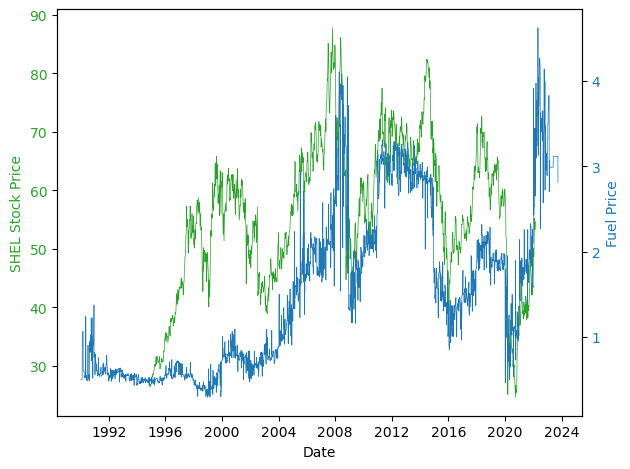

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Read BP stock prices CSV file
df_stock_BP = pd.read_csv("BP stock price.csv", parse_dates=["Date"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

# Read SHEL stock prices CSV file
df_stock_SHEL = pd.read_csv("SHEL stock price.csv", parse_dates=["Date"], date_parser=lambda x: pd.to_datetime(x, format="%Y-%m-%d"))

# Read jet fuel prices CSV file
df_fuel = pd.read_csv("Jet fuel price last 30 years.csv", parse_dates=["Date"])

# Resample fuel prices data to business days
df_fuel = df_fuel.set_index('Date').resample('B').ffill().reset_index()


# Merge the BP and fuel datasets on the DATE column
merged_data_bp = pd.merge(df_stock_BP, df_fuel, on='Date', how='inner')

# Merge the SHEL and fuel datasets on the DATE column
merged_data_shel = pd.merge(df_stock_SHEL, df_fuel, on='Date', how='inner')

# Create the first plot for BP and fuel prices
fig, ax1 = plt.subplots()

# plot BP stock prices
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('BP Stock Price', color=color)
ax1.plot(df_stock_BP['Date'], df_stock_BP['Close'], color=color, linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)

# plot fuel prices
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fuel Price', color=color)
ax2.plot(df_fuel['Date'], df_fuel['WJFUELUSGULF'], color=color, linewidth=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

# Create the second plot for SHEL and fuel prices
fig, ax1 = plt.subplots()

# plot SHEL stock prices
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('SHEL Stock Price', color=color)
ax1.plot(df_stock_SHEL['Date'], df_stock_SHEL['Close'], color=color, linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)

# plot fuel prices
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Fuel Price', color=color)
ax2.plot(df_fuel['Date'], df_fuel['WJFUELUSGULF'], color=color, linewidth=0.5)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


BP Regression Coefficients: [[7.76202663]]
BP Regression Intercept: [29.1659984]
BP R-squared: 0.19309927046327935


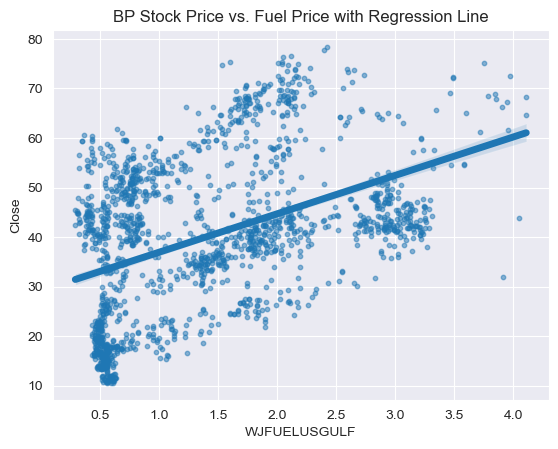

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     398.2
Date:                Fri, 10 Mar 2023   Prob (F-statistic):           1.32e-79
Time:                        21:38:32   Log-Likelihood:                -6764.9
No. Observations:                1666   AIC:                         1.353e+04
Df Residuals:                    1664   BIC:                         1.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           29.1660      0.650     44.878   

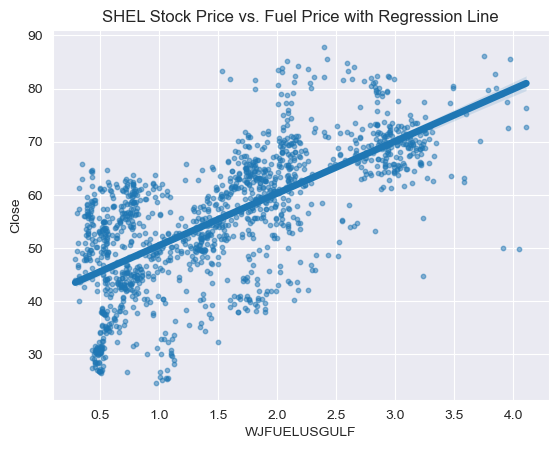

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     1254.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):          1.43e-197
Time:                        21:38:32   Log-Likelihood:                -5195.2
No. Observations:                1427   AIC:                         1.039e+04
Df Residuals:                    1425   BIC:                         1.040e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           40.6060      0.496     81.815   

In [161]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set_style("darkgrid")
# Use scikit-learn to perform linear regression on BP data
X = merged_data_bp['WJFUELUSGULF'].values.reshape(-1,1)
y = merged_data_bp['Close'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)

# Print the coefficients and R-squared value for BP data
print(f"BP Regression Coefficients: {regressor.coef_}")
print(f"BP Regression Intercept: {regressor.intercept_}")
print(f"BP R-squared: {regressor.score(X, y)}")

# Visualize the linear regression line for BP data
sns.regplot(data=merged_data_bp, x="WJFUELUSGULF", y="Close", scatter_kws={"s": 10, "alpha": 0.5}, line_kws={'lw': 5})
plt.title("BP Stock Price vs. Fuel Price with Regression Line")
plt.show()


# Perform the regression analysis
X = sm.add_constant(merged_data_bp['WJFUELUSGULF'])
model = sm.OLS(merged_data_bp['Close'], X)
results = model.fit()
print(results.summary())

print("\nBased on the regression analysis, the results show that there is a significant positive correlation between BP's stock prices and the jet fuel prices. Specifically, the R-squared value of 0.193 suggests that approximately 19% of the variation in BP's stock prices can be explained by changes in jet fuel prices. Additionally, the coefficient of 7.7620 indicates that for each one unit increase in jet fuel prices, BP's stock prices are expected to increase by 7.7620 units. Both the coefficient and its associated p-value of 0.000 suggest that the relationship between jet fuel prices and BP's stock prices is statistically significant.")




#---------------------------------------------------------------


# Use scikit-learn to perform linear regression on BP data
X = merged_data_shel['WJFUELUSGULF'].values.reshape(-1,1)
y = merged_data_shel['Close'].values.reshape(-1,1)
regressor = LinearRegression()
regressor.fit(X, y)

# Print the coefficients and R-squared value for BP data
print(f"SHEL Regression Coefficients: {regressor.coef_}")
print(f"SHEL Regression Intercept: {regressor.intercept_}")
print(f"SHEL R-squared: {regressor.score(X, y)}")

# Visualize the linear regression line for BP data
sns.regplot(data=merged_data_shel, x="WJFUELUSGULF", y="Close", scatter_kws={"s": 10, "alpha": 0.5}, line_kws={'lw': 5})
plt.title("SHEL Stock Price vs. Fuel Price with Regression Line")
plt.show()


# Perform the regression analysis
X = sm.add_constant(merged_data_shel['WJFUELUSGULF'])
model = sm.OLS(merged_data_shel['Close'], X)
results = model.fit()
print(results.summary())

print("\nFor the SHEL stock, the coefficient of the WJFUELUSGULF variable is 9.8266, which means that a one-unit increase in WJFUELUSGULF is associated with an increase of $9.83 in the closing price of SHEL stock. The p-value is less than 0.05, indicating that this relationship is statistically significant. The R-squared value is 0.468, which suggests that approximately 46.8% of the variance in the closing price of SHEL stock can be explained by changes in the WJFUELUSGULF variable.")
print("\nThe higher R-squared values from the SHEL stock price tendencies could be explained by the company's involvement in other areas of the oil market structure.")


In [164]:
print("""

Airlines need a projected cost management framework of which they can trust to efficiently stabilize a 'risk factor'. 
They can approach this with different strategies:

      - Fuel hedge contracts:
          - To mitigate the impact of price fluctuations, airlines can enter into fuel hedge contracts with suppliers. 
          These contracts allow airlines to lock in fuel prices for a set period of time, 
          providing them with more stability in their fuel costs. 
          
      - More fuel efficient/seat aircrafts:
          - Airlines can also invest in more fuel-efficient aircraft to reduce their fuel consumption by using
          advanced materials and technologies to reduce weight and improve aerodynamics, and also by increasing 
          the number of seats on an aircraft, which spreads the fuel cost over more passengers.
          
      - Adding/modifying their route network strategies:
          - One approach is to form strategic partnerships or alliances with other airlines to share resources 
          and expand their route networks. This can help airlines increase their market share and reduce their costs 
          by sharing expenses such as code-sharing flights, ground handling services, and maintenance and repair.
          - Another approach to analyzing demand is to use data on passenger traffic, such as origin-destination traffic flows, 
          to identify routes with high demand. The airline can also analyze data on seasonality and trends 
          to adjust their flight schedules accordingly.
      
      """)



Airlines need a projected cost management framework of which they can trust to efficiently stabilize a 'risk factor'. 
They can approach this with different strategies:

      - Fuel hedge contracts:
          - To mitigate the impact of price fluctuations, airlines can enter into fuel hedge contracts with suppliers. 
          These contracts allow airlines to lock in fuel prices for a set period of time, 
          providing them with more stability in their fuel costs. 
          
      - More fuel efficient/seat aircrafts:
          - Airlines can also invest in more fuel-efficient aircraft to reduce their fuel consumption by using
          advanced materials and technologies to reduce weight and improve aerodynamics, and also by increasing 
          the number of seats on an aircraft, which spreads the fuel cost over more passengers.
          
      - Adding/modifying their route network strategies:
          - One approach is to form strategic partnerships or alliances with 